### Deep learning to predict large patterns in weather data

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from numpy import unique
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import SimpleRNN

In [35]:
# import additional libraries

from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [36]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

In [37]:
#import dataframe
# The following transformations were done in Excel before importing the data set:
# i. two observations, 'wind speed' and 'snow depth' have been removed for all weather stations
# ii. data imputation from nearby weather stations to those with missing observations have been conducted. 
# This includes 'cloud cover' for KASSEL station from LJUBLJAN, 'pressure' for MUNCHENB from SONNBLICK and 'humidity' for STOCKHOLM from OSLO

station = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed-edited.csv'))

In [38]:
station.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,12.2,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,12.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,11.6,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,12.6,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,12.0,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [39]:
#import answers dataframe
picnic = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [40]:
#drop columns in dataframe that are not in the pleasant weather dataframes, and DATE and MONTH columns
dfmatch= station.drop(['MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation','GDANSK_temp_mean', 'GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',  'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max' ], axis = 1)

In [41]:
dfmatch.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [42]:
dfmatch.shape

(22950, 136)

In [43]:
# Export the cleaned version for later use
dfmatch.to_csv(os.path.join(path, 'cleaned_dated.csv'))

In [46]:
# Create X and y matrices
X = dfmatch.drop(['DATE'], axis=1)
y = picnic.drop(['DATE'], axis=1)

In [47]:
print(X.shape)
print(y.shape)

(22950, 135)
(22950, 15)


In [49]:
# Reshape
X = X.values.reshape(-1,15,9)

In [50]:
print(X.shape)

(22950, 15, 9)


In [51]:
# Reshape
y = y.values.reshape(-1,15)

In [52]:
print(y.shape)

(22950, 15)


In [53]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15, 9)
(5738, 15, 9)
(17212, 15)
(5738, 15)


In [55]:
len(X_train[0])

15

In [56]:
len(X_train[0][0])

9

In [57]:
len(y_train[0])

15

### Simple RNN Model

In [66]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(15, 9), activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.TruePositives(name='tp'),
                                                                      keras.metrics.FalsePositives(name='fp'),
                                                                      keras.metrics.TrueNegatives(name='tn'),
                                                                      keras.metrics.FalseNegatives(name='fn'),
                                                                      keras.metrics.BinaryAccuracy(name='accuracy'),
                                                                      keras.metrics.Precision(name='precision'),
                                                                      keras.metrics.Recall(name='recall'),
                                                                      keras.metrics.AUC(name='auc')])

In [67]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/4
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8421 - auc: 0.8885 - fn: 9794.1357 - fp: 8371.0674 - loss: 0.3573 - precision: 0.6454 - recall: 0.6170 - tn: 92957.0234 - tp: 18117.6621 - val_accuracy: 0.9018 - val_auc: 0.9566 - val_fn: 4430.0000 - val_fp: 4020.0000 - val_loss: 0.2137 - val_precision: 0.7742 - val_recall: 0.7567 - val_tn: 63839.0000 - val_tp: 13781.0000
Epoch 2/4
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9039 - auc: 0.9596 - fn: 6425.6699 - fp: 5916.1899 - loss: 0.2104 - precision: 0.7869 - recall: 0.7736 - tn: 95151.5625 - tp: 21746.4629 - val_accuracy: 0.9127 - val_auc: 0.9653 - val_fn: 3360.0000 - val_fp: 4153.0000 - val_loss: 0.1931 - val_precision: 0.7815 - val_recall: 0.8155 - val_tn: 63706.0000 - val_tp: 14851.0000
Epoch 3/4
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9127 - auc: 0.9657 - fn: 5723.5923 - fp: 5516.4370 - loss: 0.1931 - precision: 0.8004 - recall: 0.7946 - tn: 95717.9141 - tp: 22281.9453 - val_accur

In [81]:
y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [92]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([stations[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([stations[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [91]:
stations = {
    0: 'BASSEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
    10: 'MUNCHENB',
    11: 'OSLO',
    12: 'SONNBLICK',
    13: 'STOCKHOLM',
    14: 'VALENTIA'
    
}

In [93]:
# Evaluate
print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Pred        BASSEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  KASSEL  \
True                                                                           
BASSEL          93      1720        69       4          27        72      20   
BELGRADE         6       350        33       1           5         2       8   
BUDAPEST         1        27        15       0           3         8       2   
DEBILT           1         0         1       0           1         4       1   
DUSSELDORF       1         0         0       0           2         2       0   
HEATHROW         1         2         0       0           0        10       0   
KASSEL           0         1         0       0           0         1       0   
LJUBLJANA        0         3         0       0           0         0       0   
MAASTRICHT       0         0         1       0           1         1       0   
MADRID           0         6         2       0           0         4       0   

In [99]:
scores = model.predict(X_test)

lst = []
for n in range(len(scores)):
    lst.append([int(round(elem, 0)) for elem in list(scores[n])])

lst = np.array(lst)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

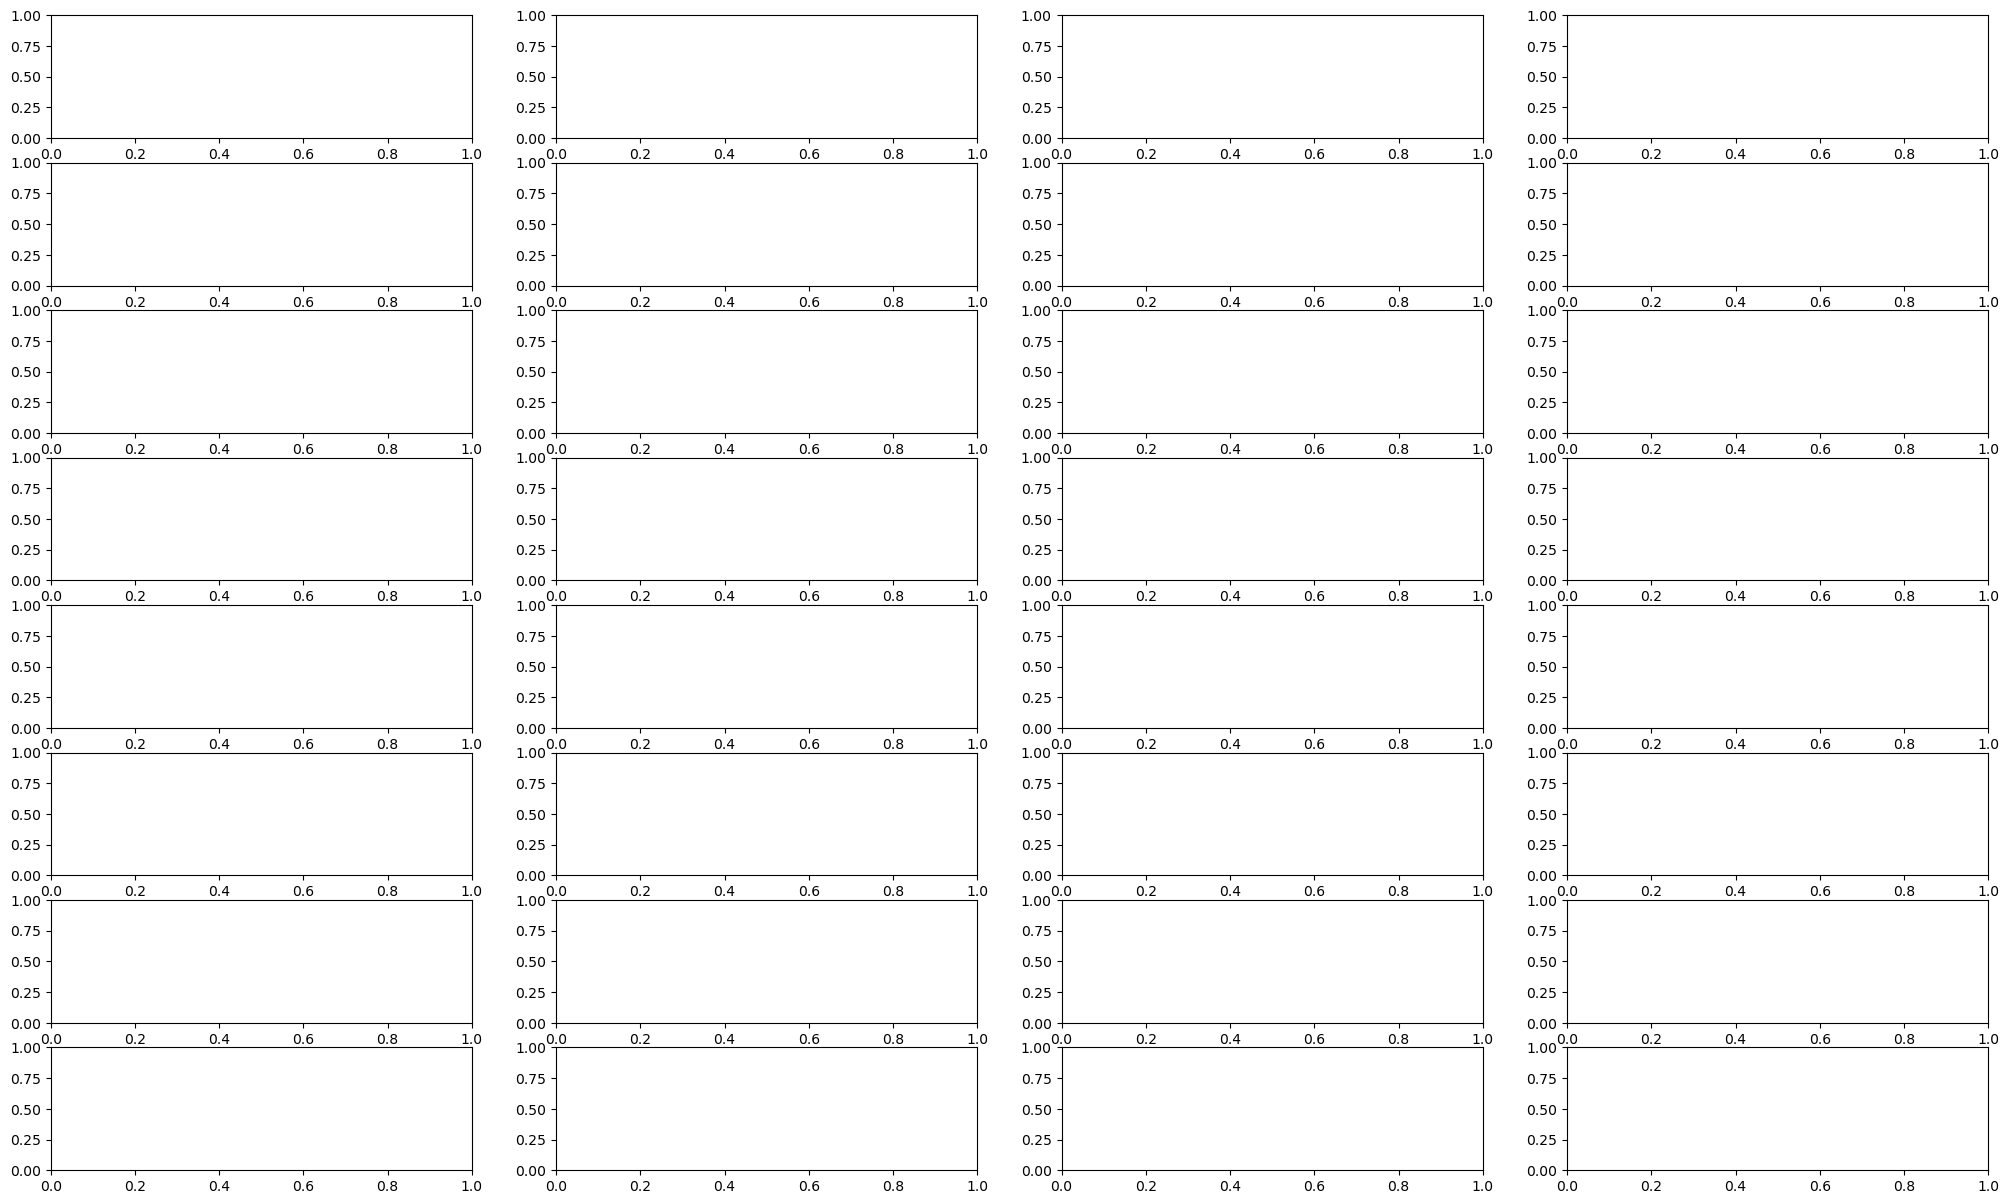

In [102]:
f, axes = plt.subplots(8, 4, figsize=(25, 15))
axes = axes.ravel()
for i in range(15):
    if i==12:
        labels = [0]
    else:
        labels = [0,1]
        disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:, i],lst[:, i]),display_labels=labels)
        disp.plot(ax=axes[i], values_format='.4g')
        disp.ax_.set_title(locations[i])

    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
        disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.08, hspace=0.08)
f.colorbar(disp.im_, ax=axes)
plt.show()